In [2]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지


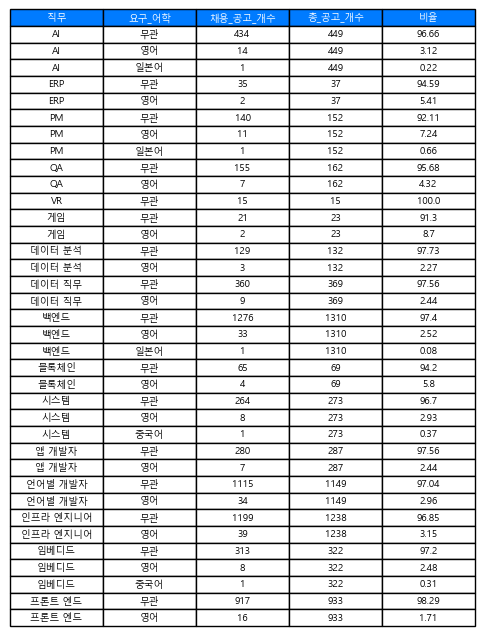

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ✅ SQLite 데이터베이스 연결
db_path = "c:/Users/asia/Desktop/asia_camp_2024/final_project_asia/3.ETL_DB_Load(Career,Language)/asia (2).db"
conn = sqlite3.connect(db_path)

try:
    # ✅ SQL 쿼리 실행 (DB에서 데이터 가져오기)
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS 직무,
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관'
        END AS 요구_어학,
        COUNT(*) AS 채용_공고_개수,
        t.total_jobs AS 총_공고_개수,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS 비율
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, 요구_어학, t.total_jobs
    ORDER BY f.category, 비율 DESC;
    """

    # ✅ 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)
    df.columns = df.columns.str.strip()  # 한글 깨짐 방지

    # ✅ 📌 테이블 형식 시각화 (헤더 색상 적용)
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.axis("tight")
    ax.axis("off")

    # ✅ 테이블 생성 (헤더 색상: 파란색)
    table = ax.table(
        cellText=df.values, 
        colLabels=df.columns, 
        cellLoc="center", 
        loc="center",
        colColours=["#007bff"] * len(df.columns)  # 헤더 색상 적용
    )

    # ✅ 헤더 글씨를 하얀색으로 변경
    for i, key in enumerate(df.columns):
        cell = table[0, i]
        cell.set_text_props(color="white")  # 헤더 글씨 흰색

    # ✅ 표 출력
    plt.show()

except Exception as e:
    print(f"에러 발생: {e}")

finally:
    # ✅ DB 연결 해제
    conn.close()


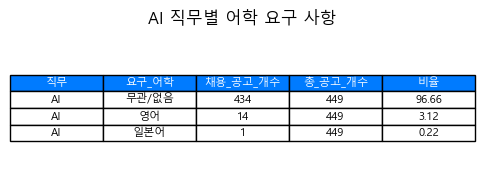

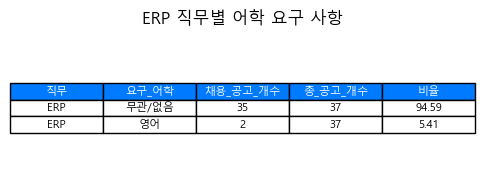

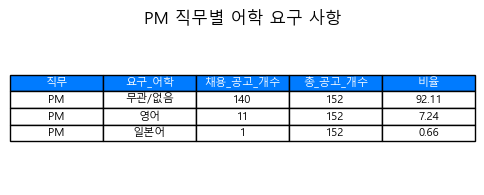

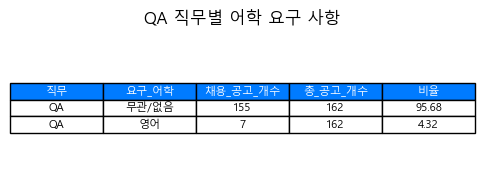

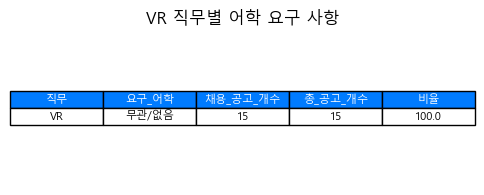

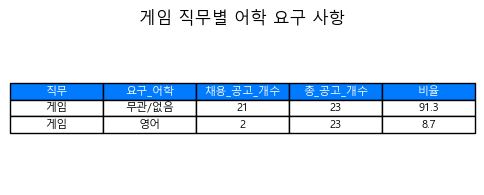

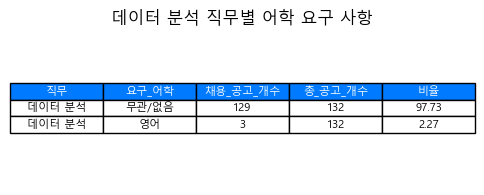

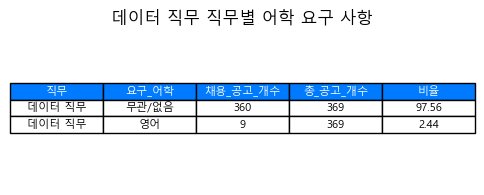

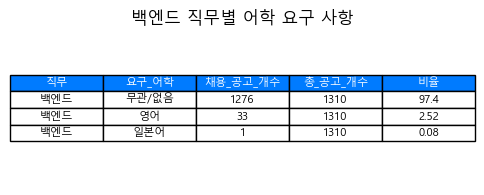

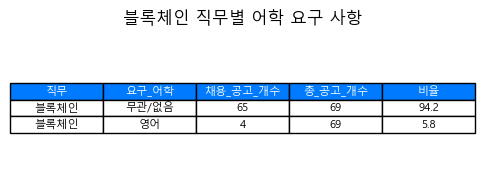

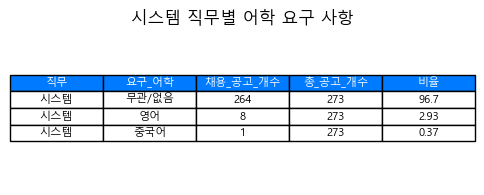

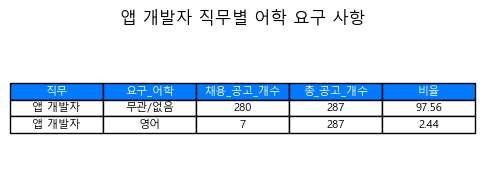

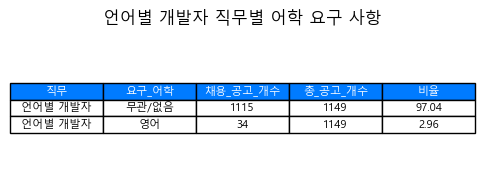

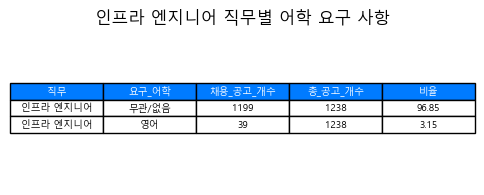

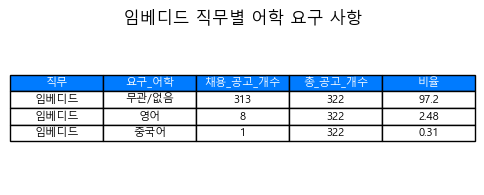

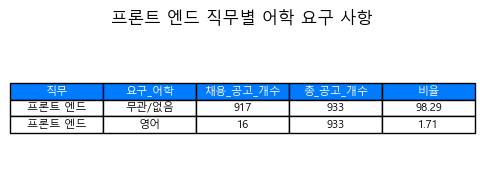

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ✅ SQLite 데이터베이스 연결
db_path = "asia (2-1).db"  # DB 파일 경로
conn = sqlite3.connect(db_path)

try:
    # ✅ SQL 쿼리 실행 (DB에서 데이터 가져오기)
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS 직무,
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관/없음'
        END AS 요구_어학,
        COUNT(*) AS 채용_공고_개수,
        t.total_jobs AS 총_공고_개수,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS 비율
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, 어학조건, t.total_jobs
    ORDER BY f.category, 비율(%) DESC;
    """

    # ✅ 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)
    df.columns = df.columns.str.strip()

    # ✅ 직무별 테이블 시각화 및 이미지 저장
    unique_duties = df["직무"].unique()

    for duty in unique_duties:
        df_duty = df[df["직무"] == duty]

        # ✅ 테이블 시각화
        fig, ax = plt.subplots(figsize=(6, 2))
        ax.axis("tight")
        ax.axis("off")

        table = ax.table(
            cellText=df_duty.values, 
            colLabels=df_duty.columns, 
            cellLoc="center", 
            loc="center",
            colColours=["#007bff"] * len(df_duty.columns)
        )

        for i, key in enumerate(df_duty.columns):
            cell = table[0, i]
            cell.set_text_props(color="white")

        plt.title(f"{duty} 직무별 어학 요구 사항")


        # ✅ 표 출력
        plt.show()

except Exception as e:
    print(f"에러 발생: {e}")

finally:
    # ✅ DB 연결 해제
    conn.close()


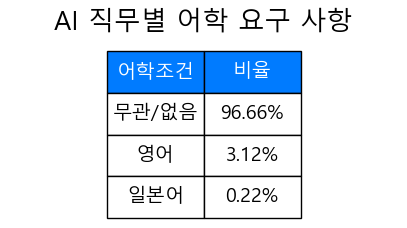

AI 직무 language 컬럼 업데이트 완료: ['Language_charts\\AI.png']


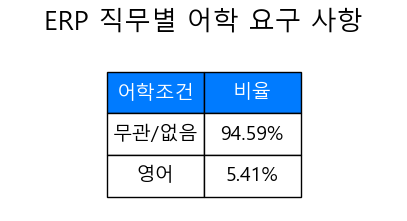

ERP 직무 language 컬럼 업데이트 완료: ['Language_charts\\ERP.png']


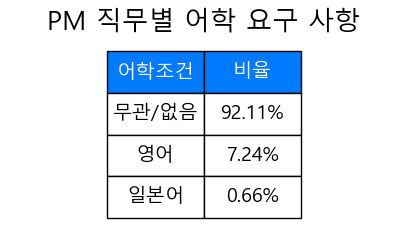

PM 직무 language 컬럼 업데이트 완료: ['Language_charts\\PM.png']


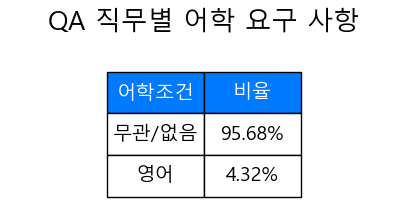

QA 직무 language 컬럼 업데이트 완료: ['Language_charts\\QA.png']


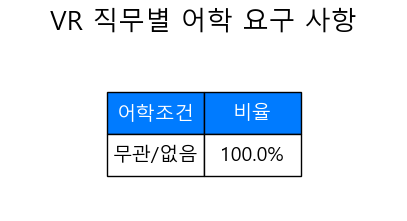

VR 직무 language 컬럼 업데이트 완료: ['Language_charts\\VR.png']


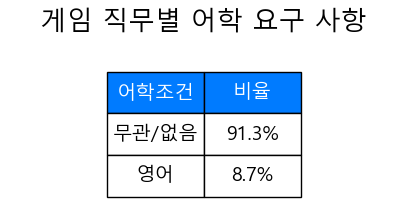

게임 직무 language 컬럼 업데이트 완료: ['Language_charts\\게임.png']


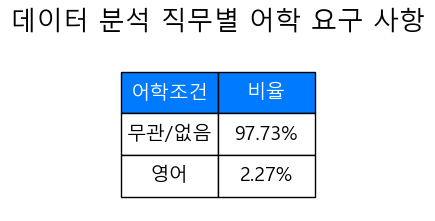

데이터 분석 직무 language 컬럼 업데이트 완료: ['Language_charts\\데이터 분석.png']


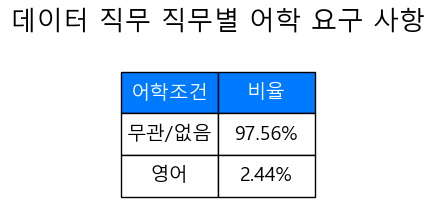

데이터 직무 직무 language 컬럼 업데이트 완료: ['Language_charts\\데이터 직무.png']


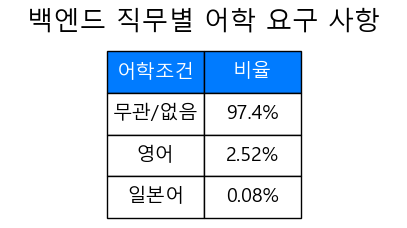

백엔드 직무 language 컬럼 업데이트 완료: ['Language_charts\\백엔드.png']


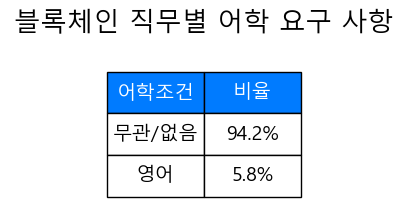

블록체인 직무 language 컬럼 업데이트 완료: ['Language_charts\\블록체인.png']


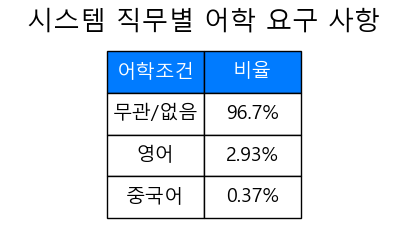

시스템 직무 language 컬럼 업데이트 완료: ['Language_charts\\시스템.png']


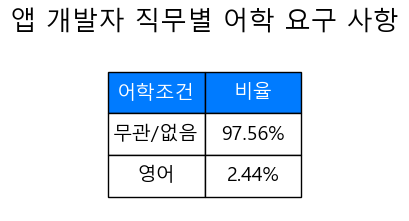

앱 개발자 직무 language 컬럼 업데이트 완료: ['Language_charts\\앱 개발자.png']


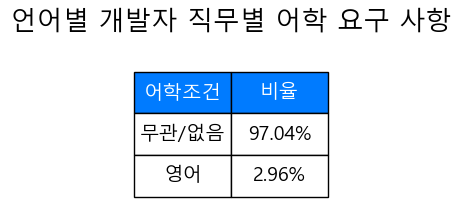

언어별 개발자 직무 language 컬럼 업데이트 완료: ['Language_charts\\언어별 개발자.png']


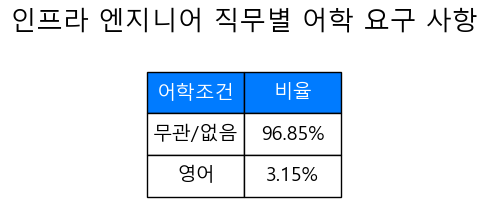

인프라 엔지니어 직무 language 컬럼 업데이트 완료: ['Language_charts\\인프라 엔지니어.png']


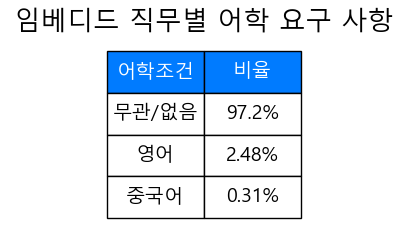

임베디드 직무 language 컬럼 업데이트 완료: ['Language_charts\\임베디드.png']


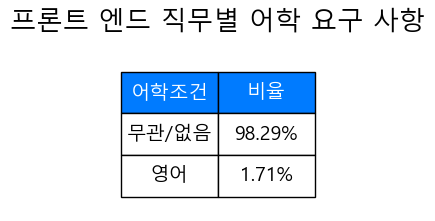

프론트 엔드 직무 language 컬럼 업데이트 완료: ['Language_charts\\프론트 엔드.png']


In [21]:
import os 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ✅ SQLite 데이터베이스 연결
db_path = "asia (2-1).db"  # DB 파일 경로
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# ✅ 이미지 저장 폴더 생성
output_dir = "Language_charts"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

try:
    # ✅ SQL 쿼리 실행 (DB에서 데이터 가져오기)
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS 직무,
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관/없음'
        END AS 어학조건,
        COUNT(*) AS 채용_공고_개수,
        t.total_jobs AS 총_공고_개수,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) || '%' AS 비율
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, 어학조건, t.total_jobs
    ORDER BY f.category, 비율 DESC;
    """

    # ✅ 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)
    df.columns = df.columns.str.strip()

    # ✅ 직무별 테이블 시각화 및 이미지 저장
    unique_duties = df["직무"].unique()

    for duty in unique_duties:
        df_duty = df[df["직무"] == duty][["어학조건", "비율"]]  # 필요한 컬럼만 선택

        # ✅ 테이블 시각화
        fig, ax = plt.subplots(figsize=(5, 2))  # 정사각형 크기로 조정
        ax.axis("tight")
        ax.axis("off")

        table = ax.table(
            cellText=df_duty.values, 
            colLabels=df_duty.columns, 
            cellLoc="center", 
            loc="center",
            colColours=["#007bff"] * len(df_duty.columns)
        )

        # ✅ 폰트 크기 조절 및 셀 크기 조정
        table.auto_set_font_size(False)
        table.set_fontsize(14)
        table.scale(0.5, 2.5)  # 가로 폭을 줄이고 높이를 조절

        # ✅ 헤더 글씨 색상 및 정렬 조정
        for i, key in enumerate(df_duty.columns):
            cell = table[0, i]
            cell.set_text_props(color="white", ha="center", va="center")

        plt.title(f"{duty} 직무별 어학 요구 사항", fontsize=19, pad=20)  # 제목 크기 조정

        # ✅ 표 출력
        plt.show()
    # ✅ 이미지 저장
        img_path = os.path.join(output_dir, f"{duty}.png")
        plt.savefig(img_path, bbox_inches="tight")
        plt.close()

        # ✅ 기존 language 컬럼 값 조회
        cursor.execute("SELECT language FROM duty_analysis WHERE duty = ?;", (duty,))
        existing_language_data = cursor.fetchone()

        # ✅ 기존 데이터가 있으면 업데이트, 없으면 새 리스트 생성
        if existing_language_data and existing_language_data[0]:
            try:
                language_list = ast.literal_eval(existing_language_data[0])
                if isinstance(language_list, list) and len(language_list) > 1:
                    language_list[0] = img_path
                else:
                    language_list = [img_path]
            except:
                language_list = [img_path]
        else:
            language_list = [img_path]

        # ✅ 업데이트할 값 변환
        updated_text = str(language_list)

        # ✅ `duty_analysis` 테이블 업데이트
        cursor.execute("UPDATE duty_analysis SET language = ? WHERE duty = ?;", (updated_text, duty))
        conn.commit()

        print(f"{duty} 직무 language 컬럼 업데이트 완료: {updated_text}")

except Exception as e:
    print(f"에러 발생: {e}")

finally:
    conn.close()


In [ ]:
# Language_charts 
# asia (2-1).db

In [10]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ast

# ✅ SQLite 데이터베이스 연결
db_path = "asia (2-1).db"  # DB 파일 경로
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# ✅ 이미지 저장 폴더 생성
output_dir = "Language_charts"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

try:
    # ✅ SQL 쿼리 실행 (DB에서 데이터 가져오기)
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS 직무,
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관/없음음'
        END AS 요구_어학,
        COUNT(*) AS 채용_공고_개수,
        t.total_jobs AS 총_공고_개수,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS 비율
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, 요구_어학, t.total_jobs
    ORDER BY f.category, 비율 DESC;
    """

    # ✅ 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)
    df.columns = df.columns.str.strip()

    # ✅ 직무별 테이블 시각화 및 이미지 저장
    unique_duties = df["직무"].unique()

    for duty in unique_duties:
        df_duty = df[df["직무"] == duty]

        # ✅ 테이블 시각화
        fig, ax = plt.subplots(figsize=(6, 2))
        ax.axis("tight")
        ax.axis("off")

        table = ax.table(
            cellText=df_duty.values, 
            colLabels=df_duty.columns, 
            cellLoc="center", 
            loc="center",
            colColours=["#007bff"] * len(df_duty.columns)
        )

        for i, key in enumerate(df_duty.columns):
            cell = table[0, i]
            cell.set_text_props(color="white")

        plt.title(f"{duty} 직무별 어학 요구 사항")

        # ✅ 이미지 저장
        img_path = os.path.join(output_dir, f"{duty}.png")
        plt.savefig(img_path, bbox_inches="tight")
        plt.close()

        # ✅ 기존 language 컬럼 값 조회
        cursor.execute("SELECT language FROM duty_analysis WHERE duty = ?;", (duty,))
        existing_language_data = cursor.fetchone()

        # ✅ 기존 데이터가 있으면 업데이트, 없으면 새 리스트 생성
        if existing_language_data and existing_language_data[0]:
            try:
                language_list = ast.literal_eval(existing_language_data[0])
                if isinstance(language_list, list) and len(language_list) > 1:
                    language_list[0] = img_path
                else:
                    language_list = [img_path]
            except:
                language_list = [img_path]
        else:
            language_list = [img_path]

        # ✅ 업데이트할 값 변환
        updated_text = str(language_list)

        # ✅ `duty_analysis` 테이블 업데이트
        cursor.execute("UPDATE duty_analysis SET language = ? WHERE duty = ?;", (updated_text, duty))
        conn.commit()

        print(f"{duty} 직무 language 컬럼 업데이트 완료: {updated_text}")

except Exception as e:
    print(f"에러 발생: {e}")

finally:
    conn.close()


AI 직무 language 컬럼 업데이트 완료: ['Language_charts\\AI.png', '1. AI 직무에서는 특정 언어 요구가 거의 없으며, 공고의 96.66%에서 언어 요구가 드문 편입니다. 2. 영어 능력이 필요한 공고 비율은 3.12%이며, 일본어 능력 요구는 0.22%로 매우 낮습니다. 3. 글로벌 협업이 필요한 경우 일부 언어 능력이 요구될 가능성이 있습니다.']
ERP 직무 language 컬럼 업데이트 완료: ['Language_charts\\ERP.png', '1. ERP 직무에서는 특정 언어 요구가 거의 없으며, 공고의 94.59%에서 언어 요구가 드문 편입니다. 2. 영어 능력이 필요한 공고 비율은 5.41%이며, 글로벌 프로젝트 및 해외 고객과의 소통을 위해 요구됩니다. 3. ERP 시스템의 글로벌 확산으로 인해 다국적 협업이 필수적입니다.']
PM 직무 language 컬럼 업데이트 완료: ['Language_charts\\PM.png', '1. PM 직무에서는 특정 언어 요구가 거의 없으며, 공고의 92.1%에서 언어 요구가 드문 편입니다. 2. 영어 능력 요구 비율은 7.24%이며, 일본어는 0.66%로 상대적으로 적습니다. 3. 글로벌 프로젝트에서 원활한 소통을 위해 어학 능력이 요구될 수 있습니다.']
QA 직무 language 컬럼 업데이트 완료: ['Language_charts\\QA.png', '1. QA 직무에서는 특정 언어 요구가 거의 없으며, 공고의 95.7%에서 언어 요구가 드문 편입니다. 2. 영어 능력이 필요한 공고 비율은 4.32%이며, 다국적 팀과 협업 시 필수적입니다. 3. 품질 관리 및 국제 표준 대응을 위해 특정 언어 능력이 중요합니다.']
VR 직무 language 컬럼 업데이트 완료: ['Language_charts\\VR.png', '1. VR 직무에서는 특정 언어 요구 사항이 없으며, 모든 공고에서 언어 능력이 필요하지 않습니다. 2. 언어보다는 개발 기술과 프로그래밍 역량이 더 중요한 

In [26]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# SQLite 데이터베이스 연결
db_path = "asia (2-1).db"  # DB 파일 경로
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# 이미지 저장 폴더 생성
output_dir = "Language_charts"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

try:
    # SQL 쿼리 실행 (DB에서 데이터 가져오기)
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS 직무,
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관/없음'
        END AS 어학조건,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) || '%' AS 비율
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, 어학조건, t.total_jobs
    ORDER BY f.category, 비율 DESC;
    """

    # 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)
    df.columns = df.columns.str.strip()

    # 직무별 테이블 시각화 및 이미지 저장
    unique_duties = df["직무"].unique()

    for duty in unique_duties:
        df_duty = df[df["직무"] == duty][["어학조건", "비율"]]  # 필요한 컬럼만 선택

        # 테이블 시각화 (표 크기 조정)
        fig, ax = plt.subplots(figsize=(6, 6))  # 정사각형 크기로 조정
        ax.axis("tight")
        ax.axis("off")

        # 표 크기를 정사각형으로 조정하고 적절한 여백 확보
        table = ax.table(
            cellText=df_duty.values, 
            colLabels=df_duty.columns, 
            cellLoc="center", 
            loc="center",
            colColours=["#007bff"] * len(df_duty.columns)
        )

        table.auto_set_font_size(False)
        table.set_fontsize(26)  # 폰트 크기 키우기
        table.scale(4, 4)  # 표 크기 확대

        for i, key in enumerate(df_duty.columns):
            cell = table[0, i]
            cell.set_text_props(color="white")

        plt.title(f"{duty} 직무별 어학 요구 사항", fontsize=40, pad=30)  # 타이틀 크기 및 간격 조정

        # 이미지 저장 (적당한 여백 확보)
        img_path = os.path.join(output_dir, f"{duty}.png")
        plt.savefig(img_path, bbox_inches="tight", pad_inches=0.5)  # 여백 조정
        plt.close()

        print(f"{duty} 직무 표 저장 완료: {img_path}")

except Exception as e:
    print(f"에러 발생: {e}")

finally:
    conn.close()


AI 직무 표 저장 완료: Language_charts\AI.png
ERP 직무 표 저장 완료: Language_charts\ERP.png
PM 직무 표 저장 완료: Language_charts\PM.png
QA 직무 표 저장 완료: Language_charts\QA.png
VR 직무 표 저장 완료: Language_charts\VR.png
게임 직무 표 저장 완료: Language_charts\게임.png
데이터 분석 직무 표 저장 완료: Language_charts\데이터 분석.png
데이터 직무 직무 표 저장 완료: Language_charts\데이터 직무.png
백엔드 직무 표 저장 완료: Language_charts\백엔드.png
블록체인 직무 표 저장 완료: Language_charts\블록체인.png
시스템 직무 표 저장 완료: Language_charts\시스템.png
앱 개발자 직무 표 저장 완료: Language_charts\앱 개발자.png
언어별 개발자 직무 표 저장 완료: Language_charts\언어별 개발자.png
인프라 엔지니어 직무 표 저장 완료: Language_charts\인프라 엔지니어.png
임베디드 직무 표 저장 완료: Language_charts\임베디드.png
프론트 엔드 직무 표 저장 완료: Language_charts\프론트 엔드.png
